In [1]:
#in His Name

# اضافه کردن کتاب‌خانه‌های مورد نیاز

در صورتیکه کتاب‌خانه‌ها را تاکنون نصب نکرده‌اید، به کمک دستورات زیر این کتاب‌خانه‌ها را اضافه نمایید

In [2]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install datetime
!pip install tqdm
!pip install sklearn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ابتدا فایل
`notifications.csv`
که همراه با این نوت‌بوک دانلود کرده‌اید را به وسیله‌ی کتابخانه
`pandas`
می‌خوانیم

In [4]:
interactions = pd.read_csv('notifications.csv')

In [5]:
interactions

,action,application_id,interaction_time,notification_id,user_id
0,F,1,4489200,79,665
1,F,1,4489200,79,6280
2,F,1,4388400,78,14774
3,F,1,4410000,78,3152
4,C,1,4410000,72,3633
...,...,...,...,...,...
140723,F,0,993600,13,14760
140724,F,0,928800,13,2096
140725,F,0,900000,13,11308
140726,F,0,885600,13,5975


در این مرحله به کمک کتاب‌خانه `datetime` پیش‌پردازش لازم را روی داده انجام داده و ستون های جدیدی به آن اضافه می‌کنید. 

In [9]:
stime = "01/06/2019"
# time_origin = datetime.strptime(stime, "%d/%m/%Y").timestamp()
time_origin = datetime.strptime(stime, "%d/%m/%Y").timestamp()
time_origin

1559340000.0

In [13]:
interactions['interaction_time_absolute'] = interactions['interaction_time'].map(lambda x : datetime.fromtimestamp(time_origin + int(x)))

In [57]:
interactions.head()

,action,application_id,interaction_time,notification_id,user_id,interaction_time_absolute,interaction_hour,interaction_dow,hour_hit_rate
0,F,1,4489200,79,665,2019-07-22 23:00:00,23,0,0.124309
1,F,1,4489200,79,6280,2019-07-22 23:00:00,23,0,0.124309
2,F,1,4388400,78,14774,2019-07-21 19:00:00,19,6,0.169532
3,F,1,4410000,78,3152,2019-07-22 01:00:00,1,0,0.127389
4,C,1,4410000,72,3633,2019-07-22 01:00:00,1,0,0.127389


 در این قسمت در تابع نگاشت باید از روی ورودی ساعت آن‌را استخراج کنید 

In [58]:
interactions['interaction_hour'] = interactions['interaction_time_absolute'].map(lambda x : x.hour)

 در این قسمت در تابع نگاشت باید از روی ورودی روز هفته آن‌را استخراج کنید 
حواستان باشد که روز هفته ای را که تابع مربوطه در کتابخانه `datetime` به عنوان خروجی می‌دهد برای هفته‌ای که با   شنبه آغاز می‌شود معتبر نیست :) 

In [59]:
interactions['interaction_dow'] = interactions['interaction_time_absolute'].map(lambda x : x.weekday())

# کار کردن با `interaction_hour` 

 با توابع `groupby` و `agg` می‌توانید داده را بر اساس متغیرهای مختلف گروه‌بندی کرده و روی نتیجه آن توابع مختلفی اعمال نمایید.

In [60]:
interactions.head()

,action,application_id,interaction_time,notification_id,user_id,interaction_time_absolute,interaction_hour,interaction_dow,hour_hit_rate
0,F,1,4489200,79,665,2019-07-22 23:00:00,23,0,0.124309
1,F,1,4489200,79,6280,2019-07-22 23:00:00,23,0,0.124309
2,F,1,4388400,78,14774,2019-07-21 19:00:00,19,6,0.169532
3,F,1,4410000,78,3152,2019-07-22 01:00:00,1,0,0.127389
4,C,1,4410000,72,3633,2019-07-22 01:00:00,1,0,0.127389


In [97]:
actions = interactions.groupby(['action', 'interaction_hour']).agg({'action':'count'})
actions

action
action interaction_hour        
C      0                     52
       1                    100
       2                    163
       3                    173
       4                    186
       5                    255
       6                    696
       7                    808
       8                   1136
       9                    772
       10                   945
       11                   827
       12                  1294
       13                  1180
       14                  1095
       15                   915
       16                  1927
       17                  1686
       18                  1436
       19                  1548
       20                   931
       21                   254
       22                   115
       23                    45
F      0                    383
       1                    685
       2                    914
       3                   1070
       4                   1177
       5                   1528
       6                   4472
       7                   4585
       8                   6950
       9                   4772
       10                  7851
       11                  6848
       12                 10447
       13                  9289
       14                  9408
       15                  8332
       16                 11417
       17                  9733
       18                  7584
       19                  7583
       20                  4544
       21                  1648
       22                   652
       23                   317

array([  52,  100,  163,  173,  186,  255,  696,  808, 1136,  772,  945,
        827, 1294, 1180, 1095,  915, 1927, 1686, 1436, 1548,  931,  254,
        115,   45], dtype=int64)

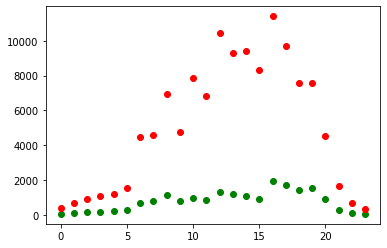

In [98]:
notifs_clicked = np.array(actions.loc['C']['action'].values)
notifs_failed = np.array(actions.loc['F']['action'].values)
notifs_count = notifs_clicked + notifs_failed
plt.scatter(range(24), notifs_clicked, c='g')
plt.scatter(range(24), notifs_failed, c='r')
notifs_clicked

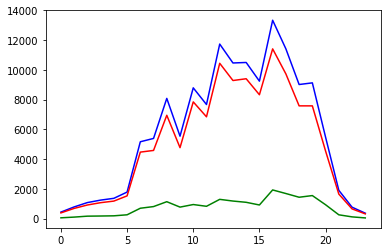

In [99]:
plt.plot(notifs_count, c='b')
plt.plot(notifs_clicked, c='g')
plt.plot(notifs_failed, c='r')
plt.show()

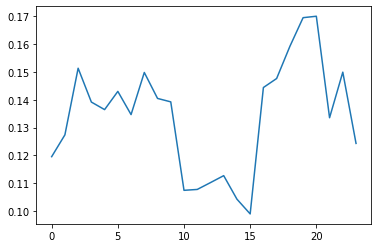

In [100]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)
plt.plot(hit_rate)
plt.show()

ستونی با نام `hour_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که در آن ساعت فرستاده شده‌اند.

In [101]:
interactions['hour_hit_rate'] = interactions['interaction_hour'].map(lambda x : hit_rate[x])

# کار کردن با `interaction_dow` 

 با توابع `groupby` و `agg`  داده را بر اساس متغیرهای `action` و `interaction_dow` گروه‌بندی کرده و تعداد هر دسته را بشمارید.

In [104]:
# actions = interactions.groupby(["action", "interaction_dow"]).action.count()
actions = interactions.groupby(["action", "interaction_dow"]).agg({"action" : "count"})
actions

action
action interaction_dow        
C      0                  1320
       1                  2605
       2                  1590
       3                  2014
       4                  3987
       5                  2804
       6                  4219
F      0                  7136
       1                 20804
       2                 11599
       3                 14320
       4                 19744
       5                 21049
       6                 27537

مانند قسمت قبل اعلان‌های موفق و ناموفق را برای هر روز هفته استخراج کرده و نمودارهای مربوطه را رسم نمایید.

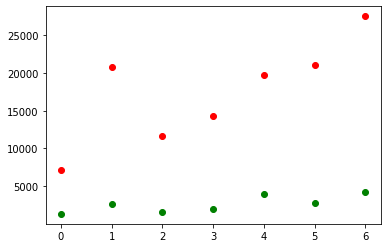

In [110]:
notifs_clicked = np.array(actions.loc["C"]["action"].values)
notifs_failed = np.array(actions.loc["F"]["action"].values)
notifs_count = notifs_clicked + notifs_failed
plt.scatter(range(7), notifs_clicked, c = "g")
plt.scatter(range(7), notifs_failed , c = "r")

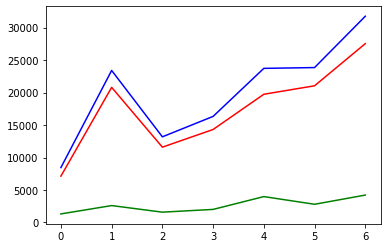

In [111]:
plt.plot(notifs_count, 'b')
plt.plot(notifs_clicked, c='g')
plt.plot(notifs_failed, c='r')
plt.show()

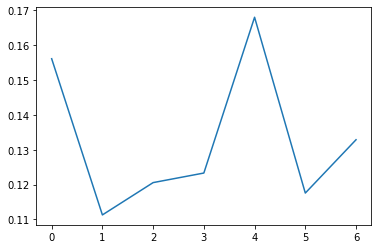

In [112]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)
plt.plot(hit_rate)
plt.show()

ستونی با نام `dow_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که در آن روز از هفته فرستاده شده‌اند.

In [113]:
interactions['dow_hit_rate'] = interactions['interaction_dow'].map(lambda x : hit_rate[x])

# کار کردن با `application_id` 

 با توابع `groupby` و `agg`  داده را بر اساس متغیرهای `action` و `application_id` گروه‌بندی کرده و تعداد هر دسته را بشمارید.

In [114]:
actions = interactions.groupby(['action', 'application_id']).agg({'action':'count'})

In [115]:
notifs_clicked = np.array(actions.loc['C']['action'].values)
notifs_failed = np.array(actions.loc['F']['action'].values)
notifs_count = notifs_clicked + notifs_failed

In [116]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)

ستونی با نام `app_id_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که از طرف آن برنامه فرستاده شده‌اند.

In [117]:
interactions['app_id_hit_rate'] = interactions['application_id'].map(lambda x : hit_rate[x])

# محاسبه درصد موفقیت اعلان‌هایی که به هر کاربر فرستاده شده‌اند

به کمک اعمال تابع `numpy.unique` روی `interactions['user_id']`، .اعضای آن‌را یکتا می‌کنیم 

In [119]:
user_ids = np.unique(interactions['user_id'])

تابع `get_user_id_hit_rate` شناسه کاربر را به عنوان ورودی دریافت کرده و درصد موفقیت اعلان‌هایی که به این کاربر فرستاده شده را به عنوان خروجی باز می‌گرداند.
مثلا اگر کاربری با شناسه کاربری `user_id` صد اعلان دریافت کرده و روی پنجاه تا کلیک کرده است، این تابع عدد `0.5`را به عنوان خروجی باز می‌گرداند.

In [126]:
def get_user_id_hit_rate(user_id):
    df = interactions[interactions.user_id == user_id]
    clicked = len(df[df.action == "F"])
    failed = len(df[df.action == "C"])
    return clicked / ( clicked + failed)

کتاب‌خانه `tqdm` برای نشان دادن درصد پیشرفت حلقه به کار می‌رود.

In [127]:
user_id_hit_rate = {}
for user_id in tqdm(user_ids):
    user_id_hit_rate[user_id] = get_user_id_hit_rate(user_id)

100%|██████████| 14233/14233 [00:50<00:00, 284.06it/s]


ستونی با نام `user_id_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که برای کاربر این اعلان، فرستاده شده است.

In [128]:
interactions['user_id_hit_rate'] = interactions['user_id'].map(lambda user_id : user_id_hit_rate[user_id])

In [129]:
interactions.head()

,action,application_id,interaction_time,notification_id,user_id,interaction_time_absolute,interaction_hour,interaction_dow,hour_hit_rate,dow_hit_rate,app_id_hit_rate,user_id_hit_rate
0,F,1,4489200,79,665,2019-07-22 23:00:00,23,0,0.124309,0.156102,0.185299,1.000000
1,F,1,4489200,79,6280,2019-07-22 23:00:00,23,0,0.124309,0.156102,0.185299,0.942308
2,F,1,4388400,78,14774,2019-07-21 19:00:00,19,6,0.169532,0.132857,0.185299,0.925926
3,F,1,4410000,78,3152,2019-07-22 01:00:00,1,0,0.127389,0.156102,0.185299,1.000000
4,C,1,4410000,72,3633,2019-07-22 01:00:00,1,0,0.127389,0.156102,0.185299,0.702128


# کاهش بعد

In [130]:
x = interactions[['hour_hit_rate', 'dow_hit_rate', 'app_id_hit_rate', 'user_id_hit_rate']]

ویژگی `action` را به کمک تابع `lambda` از فضای C, F به فضای صفر و یک بنگارید.
یعنی

- C -> 1
- F -> 0

In [134]:
y = interactions['action'].map(lambda x : 1 if x=="C" else 0)

ابتدا به کمک تابع `StandardScaler` ورودی را normal کرده و سپس به کمک تابع `PCA` آن‌را به دو متغیر، کاهش بعد دهید.  

نکته مهم:

این دو ورودی تابع `PCA` را با این مقادیر تنظیم کنید.
```python 
svd_solver = 'full'
random_state = 0
```

In [135]:
x_std = StandardScaler().fit_transform(x)
pca = PCA(svd_solver = 'full', random_state = 0, n_components=2)
x_pca = pca.fit_transform(x_std)

حال با رسم نمودار مشاهده کنید که فرایند طی شده چقدر در جداسازی دو دسته از داده موفق بوده است. در ادامه دوره می‌توانید با روش‌های مختلف دسته‌بندی، داده را دسته‌بندی کنید:)

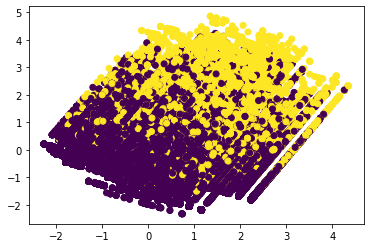

In [136]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

با این دستور `x_pca` را ذخیره کنید تا با ارزیابی آن از این مرحله عبور کنید.

In [137]:
np.save('x_pca.npy', x_pca)